# Step 1. Parameter Setting 

In [ ]:
import dtnmonitor_v2 as dtn
import subprocess,datetime,sys

def exec_print(command):
  with open(logfile, 'a') as f:
      process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
      f.write("\n# command: " + command + "(time:" + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ")\n")
      for line in iter(process.stdout.readline, b''):
          # system print
          sys.stdout.write(line)
          # log
          f.write(line.decode(sys.stdout.encoding) )


logfile='/tmp/test2.log' # log file

graph_mode=1  #0 all, 1 100pt



# Step 2. DTN System Checking Instruction Guild

## 2.1. To change TCP parameters, edit /etc/sysctl.conf as:

In [ ]:
# net.core.default_qdisc = fq
# net.core.netdev_max_backlog=250000
# net.ipv4.tcp_no_metrics_save=1
# net.ipv4.tcp_congestion_control=htcp
# net.ipv4.tcp_mtu_probing=1
# net.core.rmem_max=671088640
# net.core.wmem_max=671088640
# net.core.rmem_default=335544320
# net.core.wmem_default=335544320
# net.core.optmem_max=335544320
# net.ipv4.tcp_mem=33554432 335544320 2355443200
# net.ipv4.tcp_rmem = 409600 100873800 2147483647
# net.ipv4.tcp_wmem = 409600 100873800 2147483647

In [ ]:
# check it
# show your system config
#dtn.exec_sysout("sysctl -a |grep 'net.core\|net.ipv4.tcp'")
#dtn.exec_print("sysctl -a |grep 'net.core\|net.ipv4.tcp'")
exec_print("sysctl -a |grep 'net.core\|net.ipv4.tcp'")

## 2.2 update Mellanox driver to the most recent one (4.1) and tuning script package.


In [ ]:
### Run the tuning script in priority: 
# sudo mlnx_tune


In [ ]:
# check it
#exec_print('if [ $(ls /tmp/mlnx_tune_*.log) ];then echo "ok, good";else echo "No, you did not do it"; fi;')
exec_print("sudo /usr/sbin/mlnx_tune")

## 2.3 Bind NIC interrupt with the correct numa cores using:


In [ ]:
### /user/sbin/set_irq_affinity_bynode.sh <numa_node> <interface>


In [ ]:
# no check command

## 2.4 Check PCIe Width, Speed, Max Payload Size and Max Read Request

In [ ]:
#lspci: https://community.mellanox.com/docs/DOC-2496
# /usr/bin/setpci -s 41:00.0 68.W=5000
### Especially set Max Read Request to 4096

In [ ]:

exec_print('if [ $(lspci -s 04:00.0 -vvv | grep MaxReadReq) ];then echo "ok, good";else echo "No, you did not do it"; fi;')


## 2.5. Increase txqueuelen to 10000:


In [ ]:
### ifconfig <interface> txqueuelen 10000

In [ ]:
exec_print('ifconfig |grep txqueuelen')

## 2.6 Set CPU gonvener setting to performance:

In [ ]:
### cpupower frequency-set -g performance

In [ ]:
exec_print('cpupower frequency-info -g')

## 2.7. Turn off irqbalance and tuned:

In [ ]:
### service  irqbalance stop
### service  tuned stop

In [ ]:
exec_print('service irqbalance status ')

In [ ]:
exec_print('service tuned status ')

# Step 3. Start monitor

In [ ]:
## download and monitor
dtn.exec_command("python callmonitor_v2.py",graph_mode)


## you can stop monitoring anytime when you press "interrupt kernel"

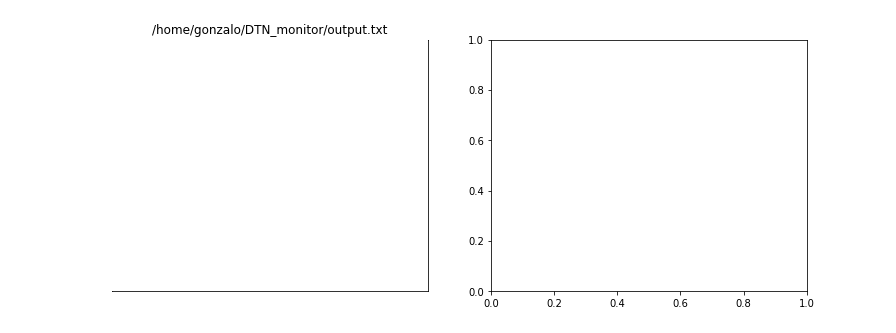

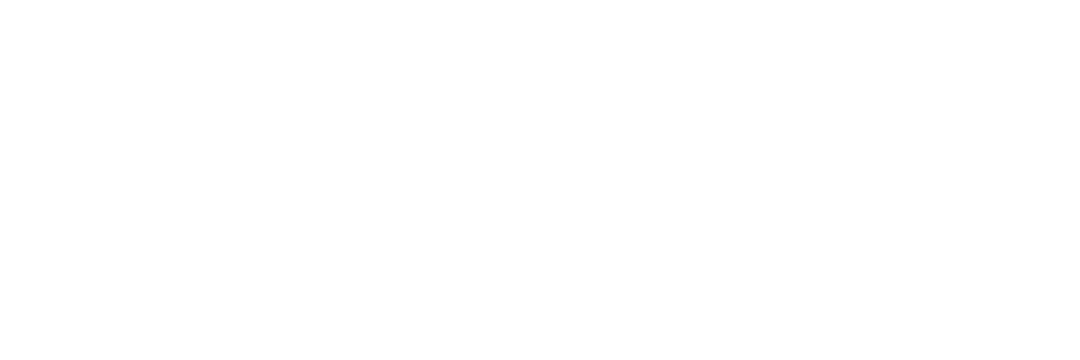

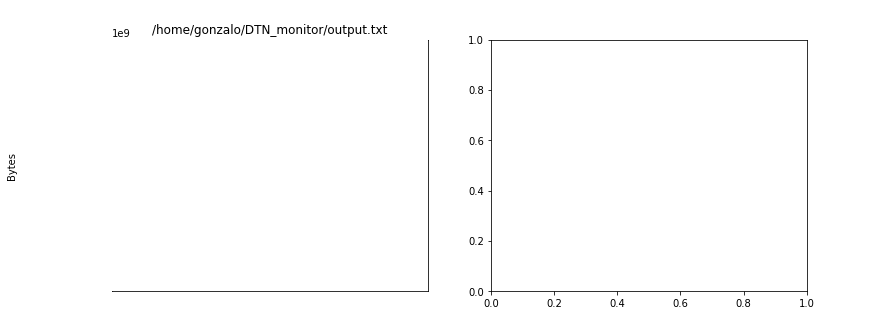

None

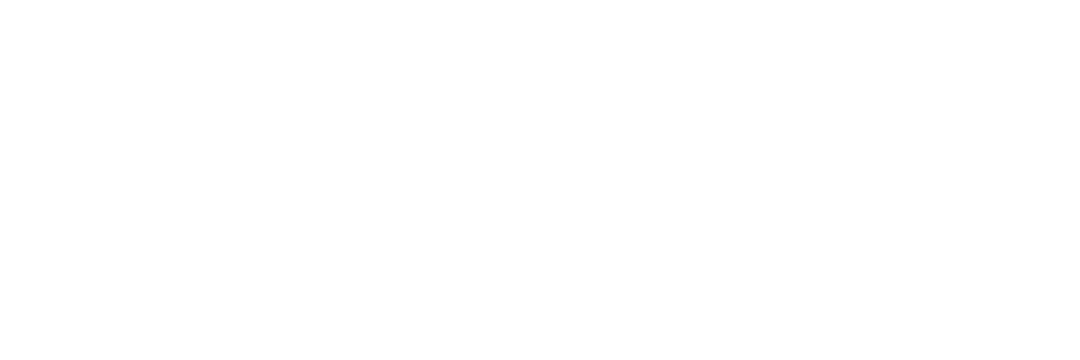

None

In [2]:
import filemon.graph as gr
from filemon import FileMonitor
import subprocess
import time
file_route="/tmp/ubuntu-16.04.3-desktop-amd64.iso?_ga=2.104950529.344709668.1507495977-1476816943.1503350384.1"
monitor_output_file="/home/gonzalo/DTN_monitor/output.txt"
fm = FileMonitor()
fm.monitor_file_name_async(file_route, 1024*1024*1024,
                                monitor_output_file)
time.sleep(1.0)
mode=0
#interface="all"
#proc = subprocess.Popen(["python3", "bandw.py", str(mode), interface], stdout=subprocess.PIPE)
thread  = gr.DataPlot(monitor_output_file)
thread.daemon = True
thread.start()


In [1]:
print("HI!")

HI!
